In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
number_of_sheets = 12
sheets = []
etc = []
for i in range(number_of_sheets):
    sheets.append(pd.read_excel('../Data/Water_balance/2021_water_balance_cc_0.xlsx', sheet_name=i, engine='openpyxl'))
    etc.append(sheets[i].iloc[-1]['ET'])

In [68]:
number_of_sheets = 12
sheets = []
etc_3 = []
for i in range(number_of_sheets):
    sheets.append(pd.read_excel('../Data/Water_balance/2021_water_balance_cc_3.xlsx', sheet_name=i, engine='openpyxl'))
    etc_3.append(sheets[i].iloc[-1]['ET'])

In [69]:
etc

[455.35588587847,
 454.2915934717383,
 456.2979466049544,
 460.0016077369457,
 455.8362224227192,
 464.5470058094637,
 263.4740575815109,
 262.0207474227327,
 270.8954751150848,
 261.2398458425985,
 270.4126262183639,
 270.4795938278572]

In [70]:
etc_3

[463.2951029286098,
 463.1004244287736,
 465.2924424645331,
 469.9966074513383,
 465.9888635120877,
 476.5024029205659,
 263.9168807179864,
 262.8570941069052,
 271.9903316161921,
 262.5295537747556,
 272.231727375649,
 272.8720102227817]

In [71]:
treatments_dict = {'11':'1','12':'2','13':'3','14':'4','15':'5','16':'6',
                   '21':'7','22':'8','23':'9','24':'10','25':'11','26':'12'}
etc_df = pd.DataFrame(data={'Water_Nrate':list(treatments_dict.keys()), 'ETc':etc, 'ETc_3':etc_3})
etc_df['Water'] = [x[0] for x in etc_df['Water_Nrate']]
etc_df['Nrate'] = [x[1] for x in etc_df['Water_Nrate']]
etc_df.drop('Water_Nrate', inplace = True, axis = 1)
etc_df['ET (Trout)'] = etc_df['ETc']
etc_df['ET (Trout v3)'] = etc_df['ETc_3']
etc_df['Nrate'] = etc_df['Nrate'].replace({'1': '20', '2': '65', '3':'110', '4':'155', '5':'200', '6':'245'})
etc_df['Water'] = etc_df['Water'].replace({'1': '100', '2': '70'})
etc_df['Nrate'] = etc_df['Nrate'].astype(int)
etc_df.sort_values(['Water','Nrate'], inplace = True)
etc_df

,ETc,ETc_3,Water,Nrate,ET (Trout),ET (Trout v3)
0,455.355886,463.295103,100,20,455.355886,463.295103
1,454.291593,463.100424,100,65,454.291593,463.100424
2,456.297947,465.292442,100,110,456.297947,465.292442
3,460.001608,469.996607,100,155,460.001608,469.996607
4,455.836222,465.988864,100,200,455.836222,465.988864
5,464.547006,476.502403,100,245,464.547006,476.502403
6,263.474058,263.916881,70,20,263.474058,263.916881
7,262.020747,262.857094,70,65,262.020747,262.857094
8,270.895475,271.990332,70,110,270.895475,271.990332
9,261.239846,262.529554,70,155,261.239846,262.529554


In [72]:
joel_et = pd.read_excel('../Data/Water_balance/Nxwater exp 2021_total ET.xlsx', engine='openpyxl', skiprows=1)
joel_et['Nrate'] = joel_et['Nrate'].astype(str)
joel_et['Water'] = joel_et['Water'].astype(str)
joel_et['Nrate'] = joel_et['Nrate'].replace({'1': '20', '2': '65', '3':'110', '4':'155', '5':'200', '6':'245'})
joel_et['Water'] = joel_et['Water'].replace({'1': '100', '2': '70'})
joel_et['Nrate'] = joel_et['Nrate'].astype(int)
joel_et['ET (Joel)'] = joel_et['ET']*25.4
joel_et.sort_values(['Water','Nrate'], inplace = True)

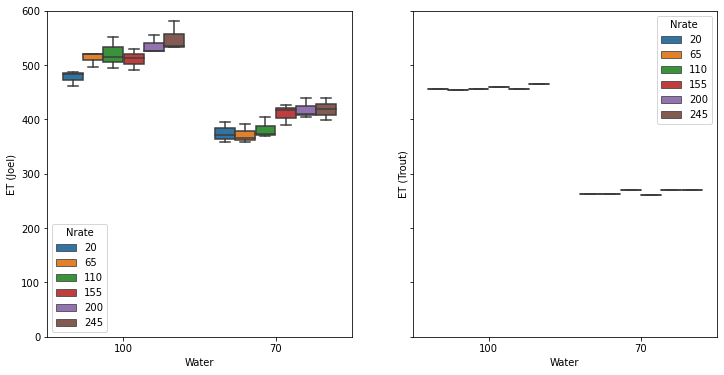

In [73]:
fig, ax = plt.subplots(1,2, figsize = (12, 6), sharey = True)

sns.boxplot(y = 'ET (Joel)', x = 'Water', hue = 'Nrate', data = joel_et, ax = ax[0])
sns.boxplot(y = 'ET (Trout)', x = 'Water', hue = 'Nrate', data = etc_df, ax = ax[1])
plt.ylim([0, 600])
plt.savefig('../Figures/et_comparison.jpg', dpi = 300, bbox_inches = 'tight')

In [74]:
etc_df

,ETc,ETc_3,Water,Nrate,ET (Trout),ET (Trout v3)
0,455.355886,463.295103,100,20,455.355886,463.295103
1,454.291593,463.100424,100,65,454.291593,463.100424
2,456.297947,465.292442,100,110,456.297947,465.292442
3,460.001608,469.996607,100,155,460.001608,469.996607
4,455.836222,465.988864,100,200,455.836222,465.988864
5,464.547006,476.502403,100,245,464.547006,476.502403
6,263.474058,263.916881,70,20,263.474058,263.916881
7,262.020747,262.857094,70,65,262.020747,262.857094
8,270.895475,271.990332,70,110,270.895475,271.990332
9,261.239846,262.529554,70,155,261.239846,262.529554


(0.0, 600.0)

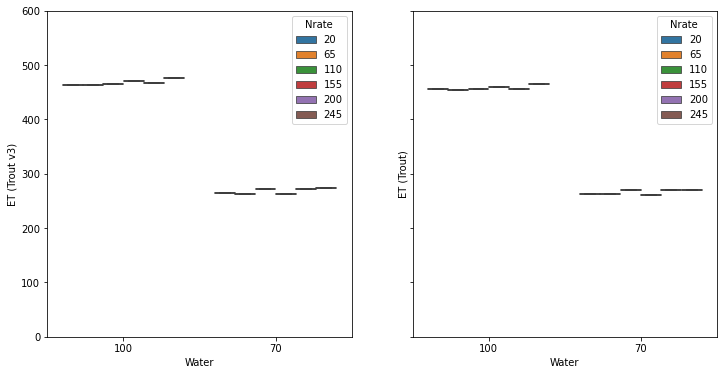

In [75]:
fig, ax = plt.subplots(1,2, figsize = (12, 6), sharey = True)

sns.boxplot(y = 'ET (Trout v3)', x = 'Water', hue = 'Nrate', data = etc_df, ax = ax[0])
sns.boxplot(y = 'ET (Trout)', x = 'Water', hue = 'Nrate', data = etc_df, ax = ax[1])
plt.ylim([0, 600])
# plt.savefig('../Figures/et_comparison.jpg', dpi = 300, bbox_inches = 'tight')

<AxesSubplot:xlabel='ET (Trout v3)', ylabel='ET (Trout)'>

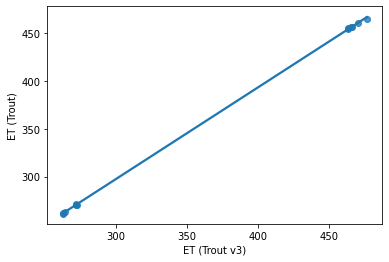

In [77]:
sns.regplot(x = 'ET (Trout v3)', y = 'ET (Trout)', data = etc_df)

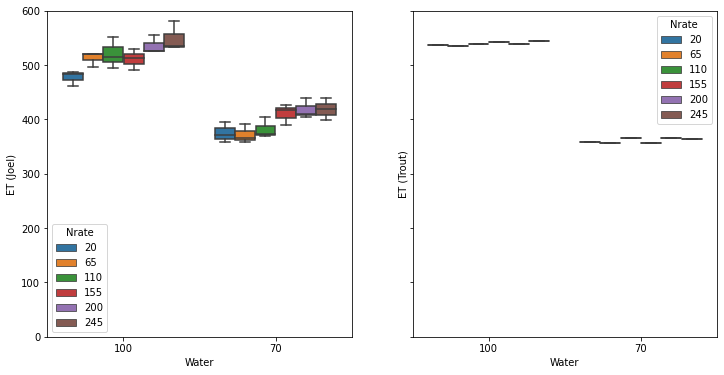

In [33]:
fig, ax = plt.subplots(1,2, figsize = (12, 6), sharey = True)

sns.boxplot(y = 'ET (Joel)', x = 'Water', hue = 'Nrate', data = joel_et, ax = ax[0])
sns.boxplot(y = 'ET (Trout)', x = 'Water', hue = 'Nrate', data = etc_df, ax = ax[1])
plt.ylim([0, 600])
plt.savefig('../Figures/et_comparison.jpg', dpi = 300, bbox_inches = 'tight')

In [7]:
joel_et_grouped = joel_et[['Water','Nrate','ET (Joel)']].groupby(['Water','Nrate']).mean().reset_index()
joel_et_grouped

,Water,Nrate,ET (Joel)
0,100,20,477.712794
1,100,65,512.589483
2,100,110,520.706448
3,100,155,510.888174
4,100,200,535.964381
5,100,245,549.292655
6,70,20,374.725534
7,70,65,371.838265
8,70,110,381.774182
9,70,155,410.879476


In [8]:
etc_df['ET (Trout)']

0     535.943964
1     534.537195
2     538.442469
3     541.547849
4     538.060673
5     544.675844
6     358.047738
7     356.805834
8     366.159978
9     357.176590
10    365.168484
11    364.274697
Name: ET (Trout), dtype: float64

In [9]:
joel_et_grouped['ET (Joel)']

0     477.712794
1     512.589483
2     520.706448
3     510.888174
4     535.964381
5     549.292655
6     374.725534
7     371.838265
8     381.774182
9     410.879476
10    418.267909
11    418.730145
Name: ET (Joel), dtype: float64

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ET (Trout)', ylabel='ET (Joel)'>

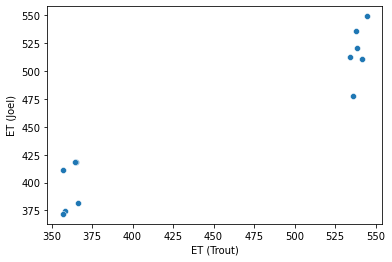

In [10]:
sns.scatterplot(etc_df['ET (Trout)'], joel_et_grouped['ET (Joel)'])